# Introduction

In this notebook, I will be exploring an [online retail dataset](https://archive.ics.uci.edu/ml/datasets/Online+Retail) in order to get insights from it.

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Exploratory Data Analysis

In [0]:
#load the dataset
retail_df = pd.read_excel("/gdrive/My Drive/Case Study AIML/Online Retail Case Study/Online Retail.xlsx")

In [4]:
#shape of our dataset
print("The shape of our dataset is: ", retail_df.shape)

The shape of our dataset is:  (541909, 8)


In [5]:
#check the head of the dataset
retail_df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [6]:
retail_df.tail(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541899,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,2011-12-09 12:50:00,3.75,12680.0,France
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France
541901,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09 12:50:00,1.95,12680.0,France
541902,581587,22629,SPACEBOY LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,2011-12-09 12:50:00,4.15,12680.0,France
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


Let's explore our dataset first by getting more information about rows and columns.

In [7]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Our dataset is composed of **541909** rows and **8** columns. When going through the columns, we notice that we have some missing values in the **CustomerID** column, as it only has **406829** values. Also the column **Description** has missing values. So, that should be considered when applying exploration to our dataset.

In [8]:
#exploring the unique values of each attribute
print("Number of transactions: ", retail_df['InvoiceNo'].nunique())
print("Number of products bought: ",retail_df['StockCode'].nunique())
print("Number of customers:", retail_df['CustomerID'].nunique() )
print("Percentage of customers NA: ", round(retail_df['CustomerID'].isnull().sum() * 100 / len(retail_df),2),"%" )
print('Number of countries: ',retail_df['Country'].nunique())

Number of transactions:  25900
Number of products bought:  4070
Number of customers: 4372
Percentage of customers NA:  24.93 %
Number of countries:  38


**Note:** The number of NA customers is quite large and that would impact the results.

This dataframe contains 8 variables that correspond to:

**InvoiceNo**: Invoice number. ***Nominal***, a 6-digit integral number uniquely assigned to each transaction. **If this code starts with letter 'c', it indicates a cancellation.** <br>
**StockCode**: Product (item) code. ***Nominal***, a 5-digit integral number uniquely assigned to each distinct product. <br>
**Description**: Product (item) name. ***Nominal***. <br>
**Quantity**: The quantities of each product (item) per transaction. ***Numeric***.<br> 
**InvoiceDate**: Invoice Date and time. ***Numeric***, the day and time when each transaction was generated. <br>
**UnitPrice**: Unit price. ***Numeric***, Product price per unit in sterling. <br>
**CustomerID**: Customer number. ***Nominal***, a 5-digit integral number uniquely assigned to each customer. <br>
**Country**: Country name. ***Nominal***, the name of the country where each customer resides.<br>

Now, let's have an idea about the quantitative data (Quantity & UnitPrice).

In [9]:
retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


The first thing to notice is that we have some negative values in our dataset. Maybe, this could mean that these quantity was returned or cancelled. (Same for UnitPrice negative values).

# Analyzing Data Quality Issues

Number of unique items

In [10]:
retail_df.StockCode.unique().shape

(4070,)

Description of items: We see that the descriptions are more then the stock code so there must be some stock code which have more than one decription

In [11]:
retail_df.Description.unique().shape

(4224,)

In [12]:
retail_df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [0]:
cat_des_df = retail_df.groupby(["StockCode","Description"]).count().reset_index()

Stockcode which have more than one description

In [14]:
cat_des_df.StockCode.value_counts()[cat_des_df.StockCode.value_counts()>1].reset_index().head()

,index,StockCode
0,20713,8
1,23084,7
2,85175,6
3,21830,6
4,23131,5


Example of one such stockcode

In [16]:
retail_df[retail_df['StockCode'] == cat_des_df.StockCode.value_counts()[cat_des_df.StockCode.value_counts()>1]
      .reset_index()['index'][6]]['Description'].unique()

array(['JUMBO BAG VINTAGE CHRISTMAS ', 'came coded as 20713',
       'wrongly coded 20713', '20713 wrongly marked', 20713], dtype=object)

## Cancelled invoices

As mentioned in the description of the dataset, some InvoiceNo start with the letter "c" = cancelled. Let's see if our hypothesis is correct about the negative quantity: **-80995**. <br>
We will look for the list of cancelled invoices and check if there is an invoice with that quantity.

In [0]:
#get canceled transactions
cancelled_orders = retail_df[retail_df['InvoiceNo'].astype(str).str.contains('C')]
cancelled_orders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [0]:
#search for transaction where quantity == -80995
cancelled_orders[cancelled_orders['Quantity']==-80995]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom


In [0]:
cancelled_orders[cancelled_orders['Quantity']>0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


As we expected, negative values in the Quantity column, mean that it's a cancelled quantity. <br>
**Question: How much cancelled orders do we have?** 

In [0]:
#check how many rows our dataframe of cancelled orders contain
print("We have ",len(cancelled_orders), " cancelled orders.")
#percentage of cancelled orders in total orders
total_orders = retail_df['InvoiceNo'].nunique()
cancelled_number = len(cancelled_orders)
print('Percentage of orders canceled: {}/{} ({:.2f}%) '.format(cancelled_number, total_orders, cancelled_number/total_orders*100))

We have  9288  cancelled orders.
Percentage of orders canceled: 9288/25900 (35.86%) 


**Answer:** We have a large percentage of cancelled orders of 35%. Studying these cancelled orders may help in preventing future cancellation.

### I.2.a) What's the average number of orders per customer?

In [0]:
# get unique InvoiceNo number per customer
groupby_customers = pd.DataFrame(retail_df.groupby('CustomerID')['InvoiceNo'].nunique())
groupby_customers.head()

,InvoiceNo
CustomerID,
12346.0,2
12347.0,7
12348.0,4
12349.0,1
12350.0,1


In [0]:
groupby_customers.describe()

,InvoiceNo
count,4372.000000
mean,5.075480
std,9.338754
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,248.000000


The average number of orders per customer  is 5.

As we found in descriptive statistics that customers buy in average (mean) a quantity of 10. Are they from the same product? Let's examine how many products are purchased.

### I.2.b) What's the average number of unique items per order?

In [0]:
groupby_invoice = pd.DataFrame(retail_df.groupby('InvoiceNo')['StockCode'].nunique())
groupby_invoice.columns=['productsNumber']
groupby_invoice.head()

,productsNumber
InvoiceNo,
536365,7
536366,2
536367,12
536368,4
536369,1


In [0]:
groupby_invoice.describe()

,productsNumber
count,25900.000000
mean,20.510618
std,42.500488
min,1.000000
25%,2.000000
50%,10.000000
75%,23.000000
max,1110.000000


In [0]:
retail_df.groupby(['InvoiceNo','CustomerID'])['StockCode'].nunique().describe()

count    22190.000000
mean        17.876566
std         22.872614
min          1.000000
25%          3.000000
50%         12.000000
75%         24.000000
max        541.000000
Name: StockCode, dtype: float64

## Explore by products per invoice

Question: Back to the description of our dataframe, we found that 75% of customers buy a quantity of 10. Are they from the same product? Let's examine how many products are purchased.

In [0]:
temp_df =retail_df.groupby(['InvoiceNo','CustomerID'],as_index=False)['InvoiceDate'].count()
transaction_df = temp_df.rename(columns = {'InvoiceDate':'Number of products'})
transaction_df.head()

,InvoiceNo,CustomerID,Number of products
0,536365,17850.0,7
1,536366,17850.0,2
2,536367,13047.0,12
3,536368,13047.0,4
4,536369,13047.0,1


In [0]:
transaction_df.describe()

,CustomerID,Number of products
count,22190.000000,22190.000000
mean,15238.498738,18.333889
std,1733.149624,23.892111
min,12346.000000,1.000000
25%,13755.000000,3.000000
50%,15136.000000,12.000000
75%,16746.000000,24.000000
max,18287.000000,542.000000


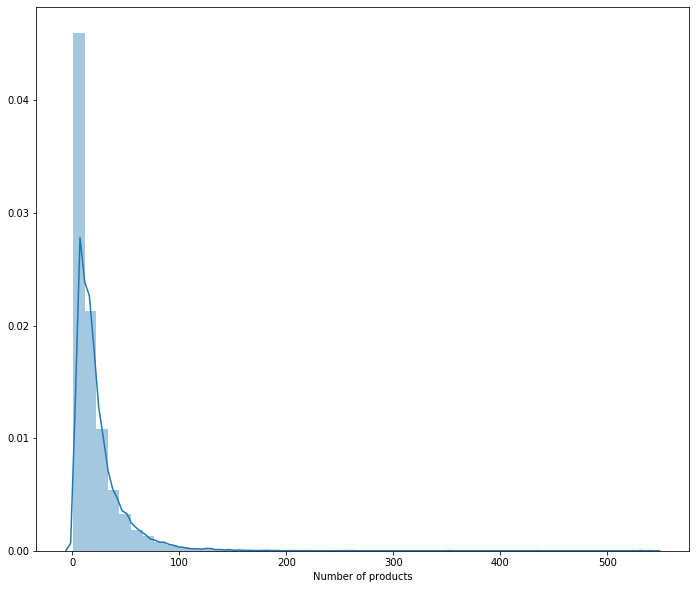

In [0]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 10)
sns.distplot(transaction_df['Number of products'],ax=ax)
plt.show()

**We have a skewed distribution of products.** Most people buy less than 25 items.

## Customers by country

In [0]:
retail_df['total_cost'] = retail_df['Quantity'] * retail_df['UnitPrice']

In [0]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


**What's the total revenue per country?**

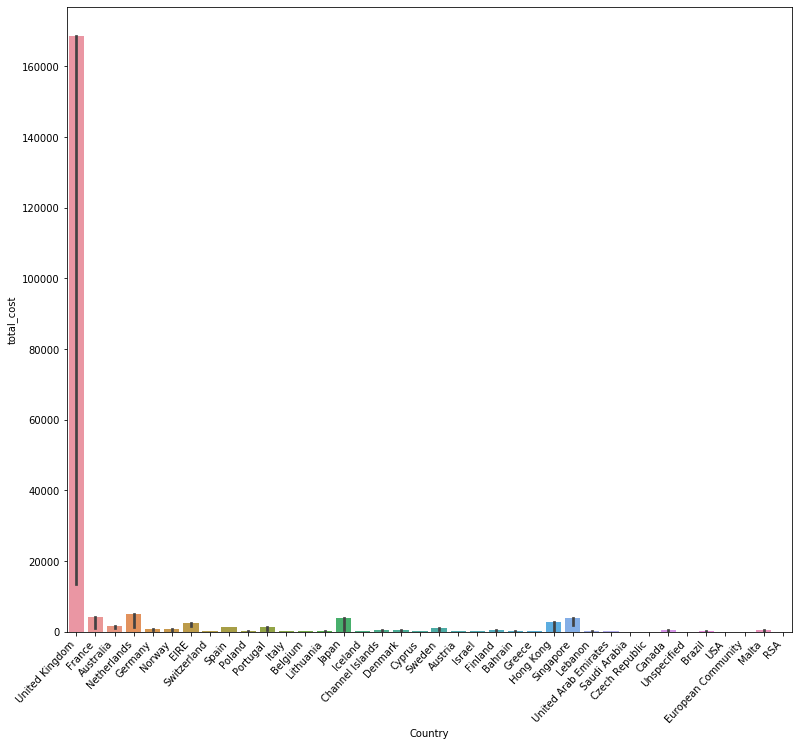

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
fig.set_size_inches(13, 11.5)
ax=sns.barplot(x='Country', y='total_cost',data=retail_df,estimator=max,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.show()


In [0]:
retail_df.groupby('Country').sum().sort_values(by='total_cost', ascending=False)

,Quantity,UnitPrice,CustomerID,total_cost
Country,,,,
United Kingdom,4263829,2.245715e+06,5.626433e+09,8.187806e+06
Netherlands,200128,6.492550e+03,3.419054e+07,2.846615e+05
EIRE,142637,4.844719e+04,1.103917e+08,2.632768e+05
Germany,117448,3.766600e+04,1.200751e+08,2.216982e+05
France,110480,4.303199e+04,1.076489e+08,1.974039e+05
Australia,83653,4.054750e+03,1.569300e+07,1.370773e+05
Switzerland,30325,6.813690e+03,2.377592e+07,5.638535e+04
Spain,26824,1.263345e+04,3.268929e+07,5.477458e+04
Belgium,23152,7.540130e+03,2.571829e+07,4.091096e+04


As we can see, the largest market is the one located in UK.

In [0]:
retail_df[retail_df['Country']=='United Kingdom']['CustomerID'].nunique()

3950

So, we can conclude not only most sales revenues are achieved in the UK, but also most customers are located there too. We can explore this to find more about what products the customers buy together and what possible future opportunities in the UK Market.

In [0]:
retail_uk = retail_df[retail_df['Country']=='United Kingdom']
retail_uk.describe()

,Quantity,UnitPrice,CustomerID,total_cost
count,495478.000000,495478.000000,361878.000000,495478.000000
mean,8.605486,4.532422,15547.871368,16.525065
std,227.588756,99.315438,1594.402590,394.839116
min,-80995.000000,-11062.060000,12346.000000,-168469.600000
25%,1.000000,1.250000,14194.000000,3.290000
50%,3.000000,2.100000,15514.000000,8.290000
75%,10.000000,4.130000,16931.000000,16.630000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [0]:
print("Number of transactions: ", retail_uk['InvoiceNo'].nunique())
print("Number of products bought: ",retail_uk['StockCode'].nunique())
print("Number of customers:", retail_uk['CustomerID'].nunique() )
print("Percentage of customers NA: ", round(retail_uk['CustomerID'].isnull().sum() * 100 / len(retail_uk),2),"%" )
print('Number of countries: ',retail_uk['Country'].nunique())

Number of transactions:  23494
Number of products bought:  4065
Number of customers: 3950
Percentage of customers NA:  26.96 %
Number of countries:  1


## Explore quantity

**What are the products that are most bought in UK?**

In [0]:
groupedProduct = retail_uk.groupby('StockCode',as_index= False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)
groupedProduct.head(10)
#check how to show product description instead of StockCode

,StockCode,Quantity
1068,22197,52928
2620,84077,48326
3655,85099B,43167
3666,85123A,36706
2733,84879,33519
1451,22616,25307
375,21212,24702
1049,22178,23242
39,17003,22801
887,21977,20288


In [0]:
invoice_quantity= retail_uk.groupby('InvoiceNo', as_index=False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)
invoice_quantity.head()

,InvoiceNo,Quantity
20090,581483,80995
2136,541431,74215
17136,574941,14149
17765,576365,13956
13770,567423,12572


I think it's important to know more about these most bought products. Is there any products that when one of them is bought, the other is bought too? When do customers buy most? At what period? 
To get an answer we will do "**Market Basket Analysis**" to find association rules between products.